# Executive summary

### Background
The project's goal was to better target marketing, customer service, and product development by segmenting doctors based on their information. The manufacturing of orthopedic devices is the primary emphasis of this company, and its goods are distributed all over the world through direct sales to individual physicians. These devices are utilized in the treatment of patients undergoing physical therapy and rehabilitation. Traditionally, the sales and customer service divisions have organized doctors into several categories according to their geographic location. On the other hand, the region does not serve as a reliable indicator of the amount of purchases a doctor will make or their requirements for support. Therefore, the goal is to improve marketing, customer service, and product planning by using a data-centric approach to segmenting doctors.

### Key Findings
1. 647 unique doctors were found in all four datasets.
2. The first six regions, '1 13', '1 9', '1 14', '1 19', '1 11' and '1 8', contain the majority of the total number of doctors. In addition, doctors living in the region designated '1 19 20' had the greatest average purchases among all other regions.
3. There is a medium positive association between median purchase and median complaint number, as seen by a correlation between median purchase and median complaint number of 0.19 suggesting that when customers raise their purchase quantity, the number of submitted complaints goes up.
4. The segmentation analysis discovered three categories of doctors: 208 doctors were promising customers, 257 doctors were at risk, and 182 doctors were active complainers.
5. Median incidence rate and median number of complaints influence "Active complainers".  "Promising customers" is influenced by median satisfaction, median purchase, and median number of complaints. The median purchase and median satisfaction score most affect "At risk clients".
6. Promising customers have higher satisfaction rates than active complainers and at-risk clients. At-risk clients and active complainers have lower and middling experience scores respectively. At-risk clients buy less than active and promising complainers. Active complainers submit more complaints than promising and at-risk customers.

### Recommendations
1. Conduct a campaign every year targeting promising customers by offering them various loyalty rewards such as a certain amount of discount on their next purchase, vouchers, gifts, etc., after reaching a certain amount of spending by a particular promising customer to keep them forever with the company. 
2. Run a survey and analysis targeting the at-risk customers to go back and understand what their objectives are, and where the failures might have been during their customer journey or post purchase experience. After conducting the survey analysis and taking effective steps to reduce those obstacles, an email marketing campaign can be conducted to target at-risk customers by being sorry for their bad experience and notifying them that the problems they faced have been completely solved. Finally, offer them a specific amount of discount in person on their first repurchase.
3. Set up a team of eligible  persons whose job it is to carefully screen complaints and deal with active complainers in a friendly way. Screen all the types of complaints submitted by the complainers, especially scrutinize the phase from product development to purchase funnel to identify what specific issues customers are facing while purchasing or after purchasing a particular product. Assign the research and development team with the defined root cause of the higher number of complaints to identify the most effective solutions for those problems and take action accordingly. Finally, notify the complainers about the resolution on their complaints.

# Methodology

### The data
***Doctors contains information on doctors. Each row represents one doctor.***
- "DoctorID" - is a unique identifier for each doctor.
- "Region" - the current geographical region of the doctor.
- "Category" - the type of doctor, either 'Specialist' or 'General Practitioner.'
- "Rank" - is an internal ranking system. It is an ordered variable: The highest level is Ambassadors, followed by Titanium Plus, Titanium, Platinum Plus, Platinum, Gold Plus, Gold, Silver Plus, and the lowest level is Silver.
- "Incidence rate"  and "R rate" - relate to the amount of re-work each doctor generates.
- "Satisfaction" - measures doctors' satisfaction with the company.
- "Experience" - relates to the doctor's experience with the company.
- "Purchases" - purchases over the last year.

***Orders contains details on orders. Each row represents one order; a doctor can place multiple orders.***
- "DoctorID" - doctor id (matches the other tables).
- "OrderID" - order identifier.
- "OrderNum" - order number.
- "Conditions A through J" - map the different settings of the devices in each order. Each order goes to an individual patient.

***Complaints collects information on doctor complaints.***
- "DoctorID" - doctor id (matches the other tables).
- "Complaint Type" - the company's classification of the complaints.
- "Qty" - number of complaints per complaint type per doctor.

***Instructions has information on whether the doctor includes special instructions on their orders.***
- "DoctorID" - doctor id (matches the other tables).
- "Instructions" - 'Yes' when the doctor includes special instructions, 'No' when they do not.

### Objectives
1. Defining number of doctors in each region and the average number of purchases per region.
2. Finding possible relationship between purchases and complaints.
3. Identifying new doctor segments that help the company improve marketing efforts and customer service.
4. Determining the features that impact the new segmentation strategy the most.
5. Describing the characteristics distinguish the newly defined segments.

### Analytical method
The scikit-learn KMeans clustering algorithm will be used to separate clients into the most beneficial and significant groups based on the analysis's main objective. Without being told what to do, the k-means clustering algorithm may locate collections of data objects in a dataset. Although there are many alternative clustering techniques, k-means is one of the most established and user-friendly. These factors make Python setup for k-means clustering rather simple, even for novice programmers and data scientists. The K-means clustering algorithm is utilized to locate groups in the data that have not been explicitly labeled. This can be used to confirm organizational hypotheses about the kinds of groups that exist or to find unidentified groupings in large, complex data sets. Any new data can be quickly allocated to the appropriate group once the algorithm has been performed and the groups have been established. When it comes to segmenting doctors, their behavioral approach will be used to do so in a way that will be beneficial in the long run and help retain clients. Behavioral segmentation uses techniques like segmenting by buying history, segmenting based on platform, website, or application activities, Create profiles based on activity monitoring or define personas based on preferences.

# Data Analysis

## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.manifold import SpectralEmbedding
from sklearn.metrics import silhouette_score

## Loading datasets

In [2]:
#Importing the doctor data
doctors = pd.read_csv('data/doctors.csv')
doctors.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases
0,AHDCBA,4 15,Specialist,Ambassador,49.0,0.90,53.85,1.20,49.0
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.0,0.00,100.00,0.00,38.0
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.0,1.53,--,0.00,34.0
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.0,2.03,--,0.48,29.0
4,FJBEA,1 14 T4,Specialist,Ambassador,23.0,0.96,76.79,0.75,24.0


In [3]:
#Importing order data
orders = pd.read_csv('data/orders.csv')
orders.head()

,DoctorID,OrderID,OrderNum,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J
0,ABJEAI,DGEJFDC,AIBEHCJ,False,False,False,False,False,True,True,False,Before
1,HBIEA,DGAJDAH,AIJIHGB,False,True,NaN,False,False,True,False,True,Before
2,GGCCD,DGBBDCB,AFEIHFB,False,False,False,False,False,False,False,False,NaN
3,EHHGF,DGCDCCF,AIBJJEE,False,False,False,True,False,False,True,False,Before
4,EHHGF,DGCFAGC,AEDBBDC,False,False,False,False,False,False,False,False,NaN


In [4]:
#Importiong complaints data
complaints = pd.read_csv('data/complaints.csv')
complaints.head()

,DoctorID,Complaint Type,Qty
0,EHAHI,Correct,10
1,EHDGF,Correct,2
2,EHDGF,Unknown,3
3,EHDIJ,Correct,8
4,EHDIJ,Incorrect,2


In [5]:
#Importing instruction data
instructions = pd.read_csv('data/instructions.csv')
instructions.head()

,DoctorID,Instructions
0,ADIFBD,Yes
1,ABHBED,No
2,FJFEG,Yes
3,AEBDAB,No
4,AJCBFE,Yes


## Basic analysis of doctors data

### Objective 1: Number of doctors in each region and Average number of purchases per region.

The first graph below demonstrates the number of doctors in each region. As per the graph, most of the doctors live in first 6 regions such as, '1 13', '1 9', '1 14', '1 19', '1 11' and '1 8'. On the other hand, the second graph demonstrates the average purchases of doctors by each region. As per the graph, doctors who live in the region '1 19 20' include the highest average purchases compared to all other regions.

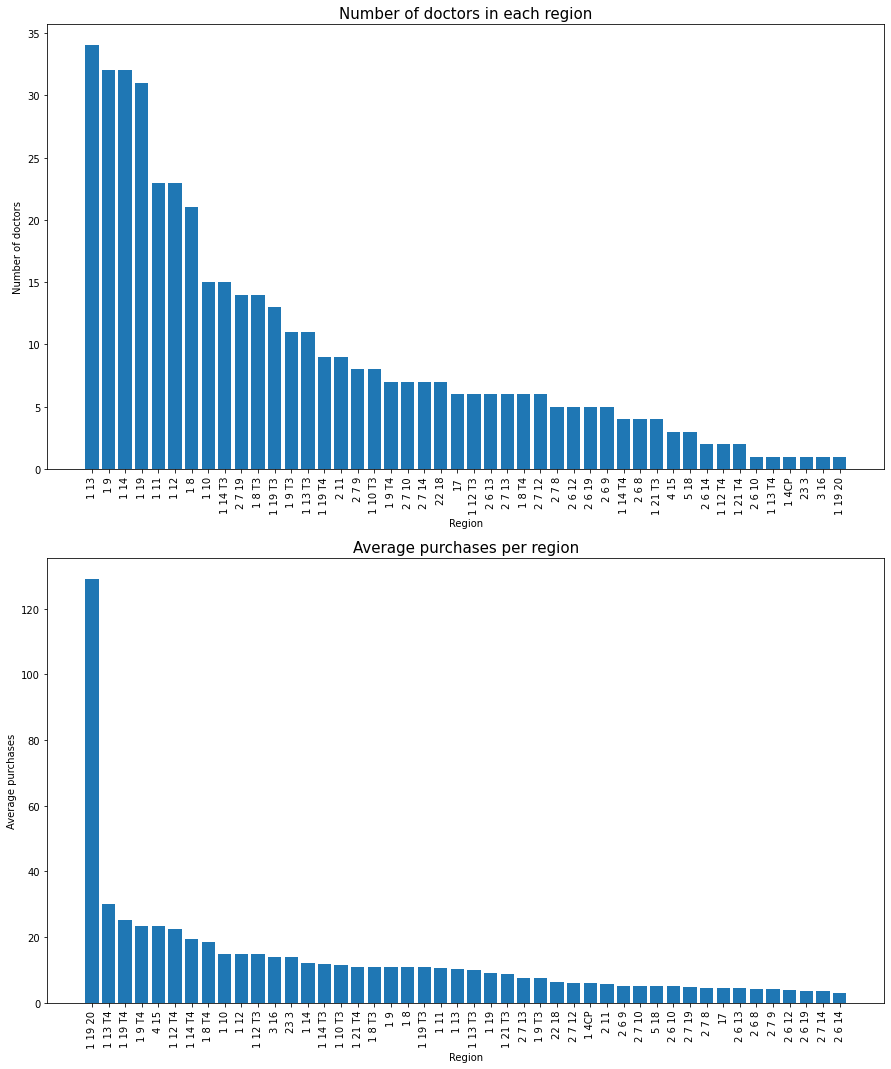

In [6]:
#Number of doctors in each region
num_doc_reg = doctors.groupby('Region')['DoctorID'].count()
num_doc_reg = num_doc_reg.sort_values(ascending = False)

#Average purchases per region
avg_per_reg = doctors.groupby('Region')['Purchases'].mean()
avg_per_reg = avg_per_reg.sort_values(ascending = False)

#Visualising data
fig, axes = plt.subplots(2, 1, figsize = (15,18))
axes[0].set_title('Number of doctors in each region', size = 15)
axes[0].bar(num_doc_reg.index, num_doc_reg.values)
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Number of doctors')
axes[0].set_xticklabels(num_doc_reg.index, rotation=90)

axes[1].set_title('Average purchases per region', size = 15)
axes[1].bar(avg_per_reg.index, avg_per_reg.values)
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Average purchases')
axes[1].set_xticklabels(avg_per_reg.index, rotation=90)

plt.show()

## Merging datasets

For the purpose of a thorough segmentation approach, the "outer" join was utilized to locate each and every doctor present in each of the four datasets. After conducting full outer join in all of the datasets, the total number of unique doctors was found to be 647, which will be evaluated once again to ensure that no doctor gets dropped from the segmentation approach.

In [7]:
#Merging doctors to orders
doc_ord = doctors.merge(orders, how = 'outer', on = 'DoctorID')

#Merging doc_ord to complaints
doc_ord_comp = doc_ord.merge(complaints, how = 'outer', on = 'DoctorID')

#Merging doc_ord_comp to instructions and get the final combined data
comb_data = doc_ord_comp.merge(instructions, how = 'outer', on = 'DoctorID')

#Checking total number of columns and rows
print('Total number of columns: ', comb_data.shape[1])
print('Total number of rows: ', comb_data.shape[0])

#Number of unique doctors
print('The total number of the unique doctors from all four datasets: ', 
      len(comb_data.DoctorID.unique()))

#Showing combined data
comb_data.head()

Total number of columns:  23
Total number of rows:  1105
The total number of the unique doctors from all four datasets:  647


,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,OrderID,...,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J,Complaint Type,Qty,Instructions
0,AHDCBA,4 15,Specialist,Ambassador,49.0,0.90,53.85,1.20,49.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.0,0.00,100.00,0.00,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.0,1.53,--,0.00,34.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.0,2.03,--,0.48,29.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FJBEA,1 14 T4,Specialist,Ambassador,23.0,0.96,76.79,0.75,24.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data cleaning of combined data

The data type that is being displayed for the satisfaction variable is an object, which is not the correct data type; rather, the data type that should have been displayed is a float64. The presence of inconsistent values (i.e., '--') in the variable is the reason why the data type of the satisfaction variable is an object rather than a float64 which has been replaced by zero. Moreover, we can observe that several of the variables have more than 50% missing data after validating the presence of null values in each variable. If more than half of the data is missing, it is not a good practice to fill in the gaps with data through imputation. Those variables that had more than 50% of their data missing were removed from the dataset. This assured that no important variables for the segmentation of doctors were accidentally dropped. Finally, 307 instances of duplication in the data set were found after the missing values were filled. To increase the data's reliability, the duplicates were removed.

In [8]:
#Check data types
comb_data.dtypes

DoctorID           object
Region             object
Category           object
Rank               object
Incidence rate    float64
R rate            float64
Satisfaction       object
Experience        float64
Purchases         float64
OrderID            object
OrderNum           object
Condition A        object
Condition B        object
Condition C        object
Condition D        object
Condition F        object
Condition G        object
Condition H        object
Condition I        object
Condition J        object
Complaint Type     object
Qty               float64
Instructions       object
dtype: object

In [9]:
#Checking data consistency of satisfaction variable
comb_data['Satisfaction'].unique()

array(['53.85', '100.00', '--', '76.79', '-50.00', '14.29', '66.67',
       '37.50', '50.00', '14.71', '75.00', '-16.67', '46.67', '81.82',
       '10.00', '-31.58', '71.05', '61.54', '-100.00', '-41.18', '60.00',
       '31.58', '0.00', '94.12', '25.00', '-25.00', '3.45', '12.50',
       '23.81', '68.75', '17.65', '55.10', '-13.33', '40.00', '56.25',
       '28.57', '5.26', '36.36', '-83.33', '55.17', '83.33', '71.43',
       '58.33', '-17.39', '-66.67', '97.73', '-12.50', '93.55', '-6.67',
       '-75.00', '-20.00', '89.47', '-33.33', '7.14', '-29.41', '33.33',
       '94.44', '-5.88', '30.77', '90.48', '-90.91', '37.04', '69.57',
       '11.11', '38.46', '90.91', '62.07', '-53.85', '86.21', '-11.76',
       '65.00', '10.71', '44.44', '41.67', '87.50', '65.22', '88.89',
       '41.18', '43.75', '27.27', '-6.25', '74.47', '11.76', '23.08',
       '80.00', '90.00', '48.57', '70.00', '-29.17', '20.00', '5.88',
       '85.96', '-26.32', '64.71', '42.86', '87.10', '31.82', '-22.22',
     

In [10]:
#Replacing inconsistence value with zero
comb_data['Satisfaction'] = comb_data['Satisfaction'].replace('--', 0)

#Assigning right data type
comb_data['Satisfaction'] = comb_data['Satisfaction'].astype('float64')

In [11]:
#Checking the percentage of missing values in each column
miss_tab = (comb_data.isnull().sum()/comb_data.shape[0]*100).round(2)
miss_tab

DoctorID           0.00
Region            28.87
Category          28.87
Rank              29.05
Incidence rate    28.87
R rate            28.87
Satisfaction      28.87
Experience        28.87
Purchases         28.87
OrderID           60.72
OrderNum          60.72
Condition A       60.72
Condition B       60.72
Condition C       61.72
Condition D       60.72
Condition F       61.09
Condition G       61.09
Condition H       60.72
Condition I       60.72
Condition J       77.65
Complaint Type    33.03
Qty               32.85
Instructions      84.43
dtype: float64

In [12]:
#Dropping columns with missing values above 50%
data = comb_data.copy()
high_miss = (miss_tab[miss_tab.values > 50]).index
comb_data = comb_data.drop(high_miss, axis = 1)

#Imputing others numeric nan values
mice_imputer = IterativeImputer()
comb_data[['Incidence rate', 
           'R rate', 'Satisfaction', 
           'Experience', 'Purchases', 'Qty']] = mice_imputer.fit_transform(comb_data[['Incidence rate', 
                                                                                      'R rate', 'Satisfaction', 
                                                                                      'Experience', 'Purchases', 'Qty']])

comb_data.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,Complaint Type,Qty
0,AHDCBA,4 15,Specialist,Ambassador,49.0,0.90,53.85,1.20,49.0,NaN,17.516763
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.0,0.00,100.00,0.00,38.0,NaN,13.140995
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.0,1.53,0.00,0.00,34.0,NaN,12.029224
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.0,2.03,0.00,0.48,29.0,NaN,10.247557
4,FJBEA,1 14 T4,Specialist,Ambassador,23.0,0.96,76.79,0.75,24.0,NaN,8.214292


In [13]:
#Checking duplicates data
comb_data.duplicated().value_counts()

False    798
True     307
dtype: int64

In [14]:
#Drop the duplicated rows
cleaned_data = comb_data.drop_duplicates()
cleaned_data.duplicated().value_counts()

False    798
dtype: int64

## Data preprocessing and analysis

The median incidence rate, R rate, satisfaction, experience, purchase, and number of complaints of each customer were used to group the cleaned data. The median value of these variables was chosen because the median indicates the central value of the distribution, which is not as susceptible to outliers as the mean is. As the following data will be used to segment customers applying KMeans clustering, the outliers should be dealt prior to deploy the model for efficient segmentation. After grouping the data, we can see that the total number of the unique doctors from grouped dataset is still 647 which indicates that no doctor has been dropped and all the doctors has been approached to the upcoming segmentation model. 

In [15]:
#Developing grouped data by each customer for cluster and other analysis purpose
grp_data = cleaned_data.groupby('DoctorID').agg({
    'Incidence rate': 'median',
    'R rate': 'median',
    'Satisfaction': 'median',
    'Experience': 'median',
    'Purchases': 'median',
    'Qty': 'median'})

#Rename columns in more meaningful way
grp_data.rename(columns = {
    'Incidence rate':'med_Inc_rate',
    'R rate':'med_R_rate',
    'Satisfaction': 'med_sat_score',
    'Experience':'med_exp_score',
    'Purchases':'med_purchases',
    'Qty':'med_num_comp'}, inplace = True)

#Number of unique doctors
print('The total number of the unique doctors from grouped datasets: ', 
      len(grp_data.index))

grp_data.head()

The total number of the unique doctors from grouped datasets:  647


,med_Inc_rate,med_R_rate,med_sat_score,med_exp_score,med_purchases,med_num_comp
DoctorID,,,,,,
AAAEAH,5.670000,1.400000,100.000000,1.300000,20.000000,1.000000
AAAHCE,3.550307,1.222107,15.772779,0.600596,13.715439,1.000000
AABAAC,3.000000,0.330000,0.000000,0.330000,3.000000,1.250111
AABBEB,5.000000,1.200000,-100.000000,0.000000,5.000000,2.261410
AABCGD,2.500000,1.570000,-33.330000,1.140000,7.000000,1.181844


### Objective 2: Finding possible relationship between purchases and complaints.

The heatmap below demonstrates the relationship between all the numeric variables in the selected dataset for cluster analysis. The heatmap shows that the correlation between median purchase and median number of complain is 0.19 indicating the presence of a lower-medium positive amount of relationship between median purchase and median number of complain. Thus, the relationship depicts that when there is an increase in number of purchase, there is an increase in number of complaints as well.

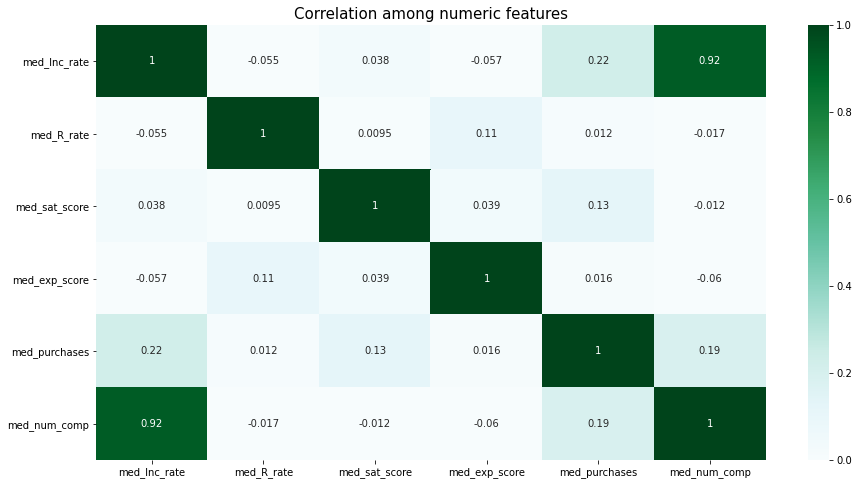

In [16]:
#Finding correlation among numeric variables
corr_ = grp_data.corr()

#Plotting correlations
plt.figure(figsize = (15, 8))
plt.title('Correlation among numeric features', size = 15)
sns.heatmap(data = corr_, annot = True, vmin = 0, vmax = 1, cmap = 'BuGn')
plt.show()

### Distribution and Transformation

According to the first dashboard shown below, the right skewness of nearly all of the variables used in the cluster analysis was observed. In the presence of normally distributed variables, KMeans cluster analysis performs excellently. The dashboard demonstrates the necessity of variable transformation for a more effective segmentation strategy in this regard. Hence, the cube root transformation has been used to reduce substantial amounts of variance among positively skewed variables, as shown in the second dashboard below. These transformed variables will be used for segmentation analysis. Finally, the transformed data was scaled for making data points generalized so that the distance between them will be lower.

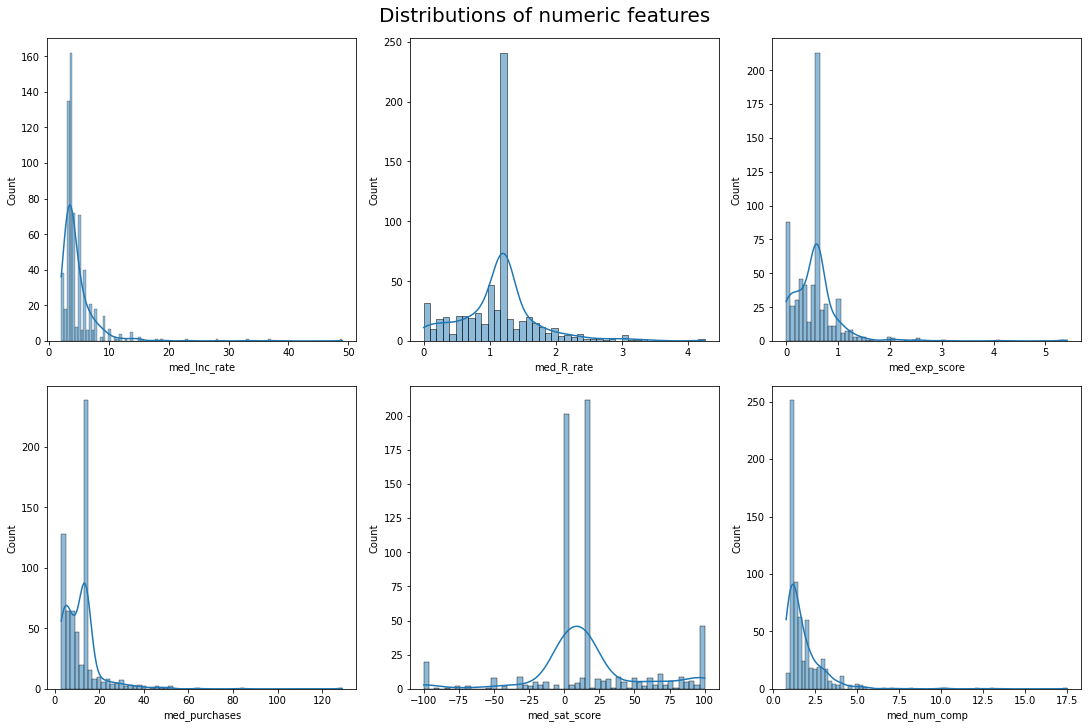

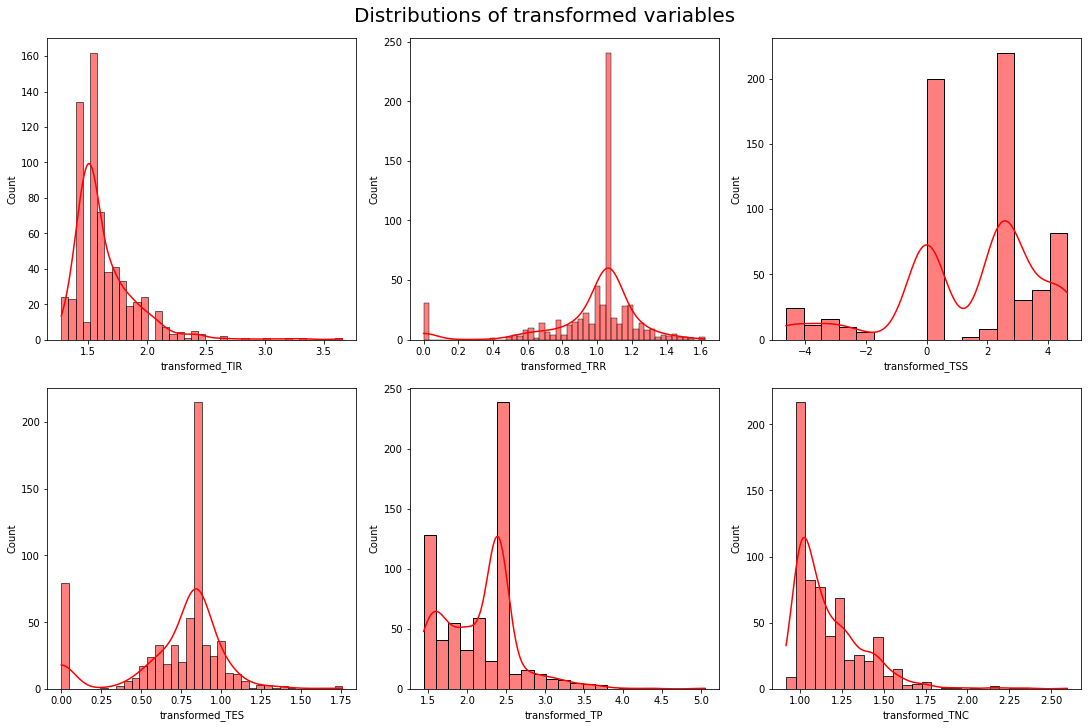

In [17]:
#Checking distributions for transformation need
fig, axes = plt.subplots(2, 3, figsize=(15, 10), constrained_layout = True)
fig.suptitle('Distributions of numeric features', size = 20)

sns.histplot(ax=axes[0,0], x=grp_data['med_Inc_rate'], kde = True)
sns.histplot(ax=axes[0,1], x=grp_data['med_R_rate'], kde = True)
sns.histplot(ax=axes[0,2], x=grp_data['med_exp_score'], kde = True)
sns.histplot(ax=axes[1,0], x=grp_data['med_purchases'], kde = True)
sns.histplot(ax=axes[1,1], x=grp_data['med_sat_score'], kde = True)
sns.histplot(ax=axes[1,2], x=grp_data['med_num_comp'], kde = True)
plt.show()

#Transformed the right skewed variables
grp_cbrt_data = np.cbrt(grp_data)

#Rename columns in more meaningful way
grp_cbrt_data.rename(columns = {
    'med_Inc_rate':'transformed_TIR',
    'med_R_rate':'transformed_TRR',
    'med_exp_score':'transformed_TES',
    'med_sat_score':'transformed_TSS',
    'med_purchases':'transformed_TP',
    'med_num_comp':'transformed_TNC'}, inplace = True)

#Checking distributions of transformed variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10), constrained_layout = True)
fig.suptitle('Distributions of transformed variables', size = 20)

sns.histplot(ax=axes[0,0], x=grp_cbrt_data['transformed_TIR'], kde = True, color = 'red')
sns.histplot(ax=axes[0,1], x=grp_cbrt_data['transformed_TRR'], kde = True, color = 'red')
sns.histplot(ax=axes[0,2], x=grp_cbrt_data['transformed_TSS'], kde = True, color = 'red')
sns.histplot(ax=axes[1,0], x=grp_cbrt_data['transformed_TES'], kde = True, color = 'red')
sns.histplot(ax=axes[1,1], x=grp_cbrt_data['transformed_TP'], kde = True, color = 'red')
sns.histplot(ax=axes[1,2], x=grp_cbrt_data['transformed_TNC'], kde = True, color = 'red')
plt.show()

In [18]:
#Transform variables for similar mean and variance
scaler = StandardScaler()
scaler.fit(grp_cbrt_data)
norm_data = scaler.transform(grp_cbrt_data)
print('mean :', norm_data.mean(axis = 0).round(2))
print('std dev :', norm_data.std(axis = 0).round(2))

mean : [-0.  0. -0. -0. -0. -0.]
std dev : [1. 1. 1. 1. 1. 1.]


## KMeans Implementation

### Objective 3: Identifying new doctor segments that help the company improve marketing efforts and customer service.

The line plot below provides silhouette scores for 2 to 15 clusters. The graph shows that silhouette scores are greater for the three clusters, showing the three-cluster approach can differentiate data more effectively. On the other hand, the segmentation study finds three kinds of doctors: 208 doctors were promising clients, 257 doctors were at risk, and 182 doctors were active complainers as shown in the scatter plot entitled with doctors with their respective clusters. The difference among the three clusters will be discussed in the 'Analysis of clusters' sections.

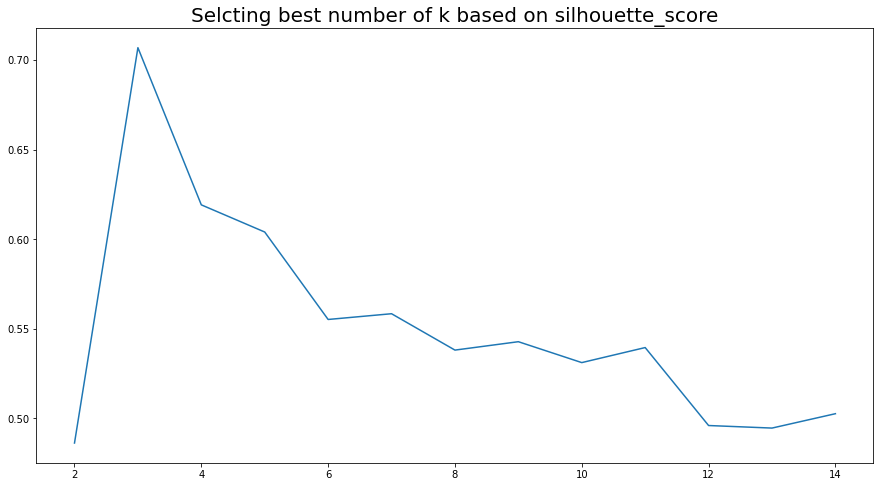

In [19]:
#Embedding data applying non-linear dimensionality reduction process
embedding = SpectralEmbedding(n_components=2)
dim_red_df = embedding.fit_transform(norm_data)

#Selcting best number of k based on silhouette_score
sse = []
for k in range(2, 15):
    clsNum = k
    kmns = KMeans(init = 'k-means++', n_clusters = clsNum, n_init = 12, random_state = 1)
    kmns.fit(dim_red_df)
    sc = silhouette_score(dim_red_df, kmns.labels_, metric='euclidean')
    sse.append(sc)

#Visualising the silhouette_score
plt.figure(figsize = (15, 8))
plt.title('Selcting best number of k based on silhouette_score', size = 20)
plt.plot(range(2, 15), sse)
plt.show()

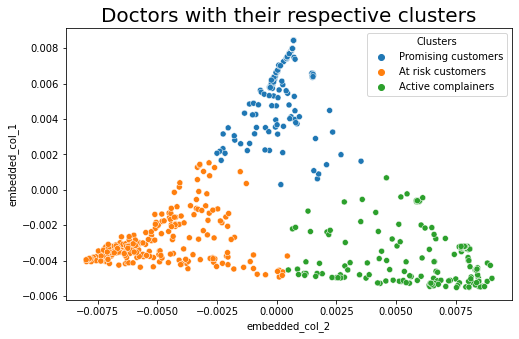

At risk customers      257
Promising customers    208
Active complainers     182
Name: Clusters, dtype: int64


In [20]:
#Model development with 3 clusters
clsNum = 3
kmns = KMeans(init = 'k-means++', n_clusters = clsNum, n_init = 12, random_state = 1)
kmns.fit(dim_red_df)
clusters = kmns.labels_

#Adding clusters to the data
clus_data = grp_data.copy()
clus_data['Clusters'] = clusters

#Assigning meaningful names to the clusters
clus_data['Clusters'] = clus_data['Clusters'].replace([1, 0, 2], ['At risk customers', 'Active complainers', 'Promising customers'])

#Converting embedded data into dataframe for better visualization purpose
emb_df = pd.DataFrame(dim_red_df, index = grp_data.index, columns = ['embedded_col_1', 'embedded_col_2'])
emb_df['Clusters'] = clus_data['Clusters']

# #Visualizing clusters 
plt.figure(figsize=(8,5))
plt.title('Doctors with their respective clusters', size = 20)
sns.scatterplot(x = 'embedded_col_2', y = 'embedded_col_1', data = emb_df, hue = 'Clusters')
plt.show()

#Number of customers in each segment
fres_clus = clus_data['Clusters'].value_counts()
print(fres_clus)

### Objective 4: Determining the features that impact the new segmentation strategy the most.

Variables in cluster analysis are shown in the heatmap above in relation to how important they are in establishing the various clusters. It is clear from the heatmap that the median incidence rate and median number of complaints have the most influence on the cluster "Active complainers". In contrast, the cluster name "Promising customers" is most strongly influenced by the median satisfaction score, median purchase, and median number of complaints. Finally, the median purchase and median satisfaction score have the greatest influence on the "At risk customers".

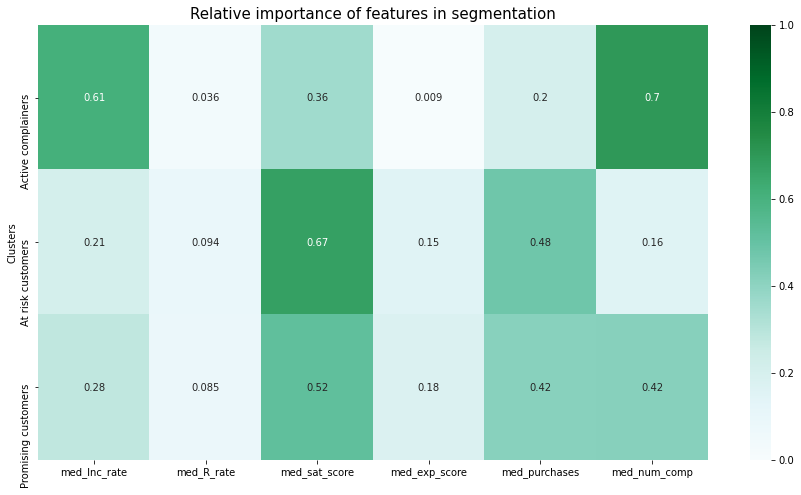

In [21]:
#Relative importance of features in segmentation
clus_avg = clus_data.groupby(['Clusters']).mean()
grp_avg = grp_data.mean()
relative_imp = abs(clus_avg/grp_avg - 1)

#Plotting the relative importance of features in segmentation
plt.figure(figsize = (15, 8))
plt.title('Relative importance of features in segmentation', size = 15)
sns.heatmap(data = relative_imp, annot = True, vmin = 0, vmax = 1, cmap = 'BuGn')
plt.show()

## Analysis of Clusters

### Objective 5: Describing the characteristics distinguish the newly defined segments.

The dashboard below shows the distribution of median satisfaction score, median experience score, median purchases, and median number of complaints by three clusters: promising customers, at risk customers, and active complainers. A graph of the median satisfaction score distribution shows that promising customers are more likely to have positive satisfaction scores and less likely to have negative satisfaction scores compared to active complainers and at risk customers. The graph of the median experience score distribution shows that promising customers are more likely to have higher experience scores, whereas at-risk customers and active complainers are more likely to have lower and medium experience scores respectively. The graph of median purchase distribution shows that at risk customers have the highest probability of purchasing less compared to the promising and active complainers. Finally, active complainers are more likely to submit higher number of complaints compared to promising and at risk customers.

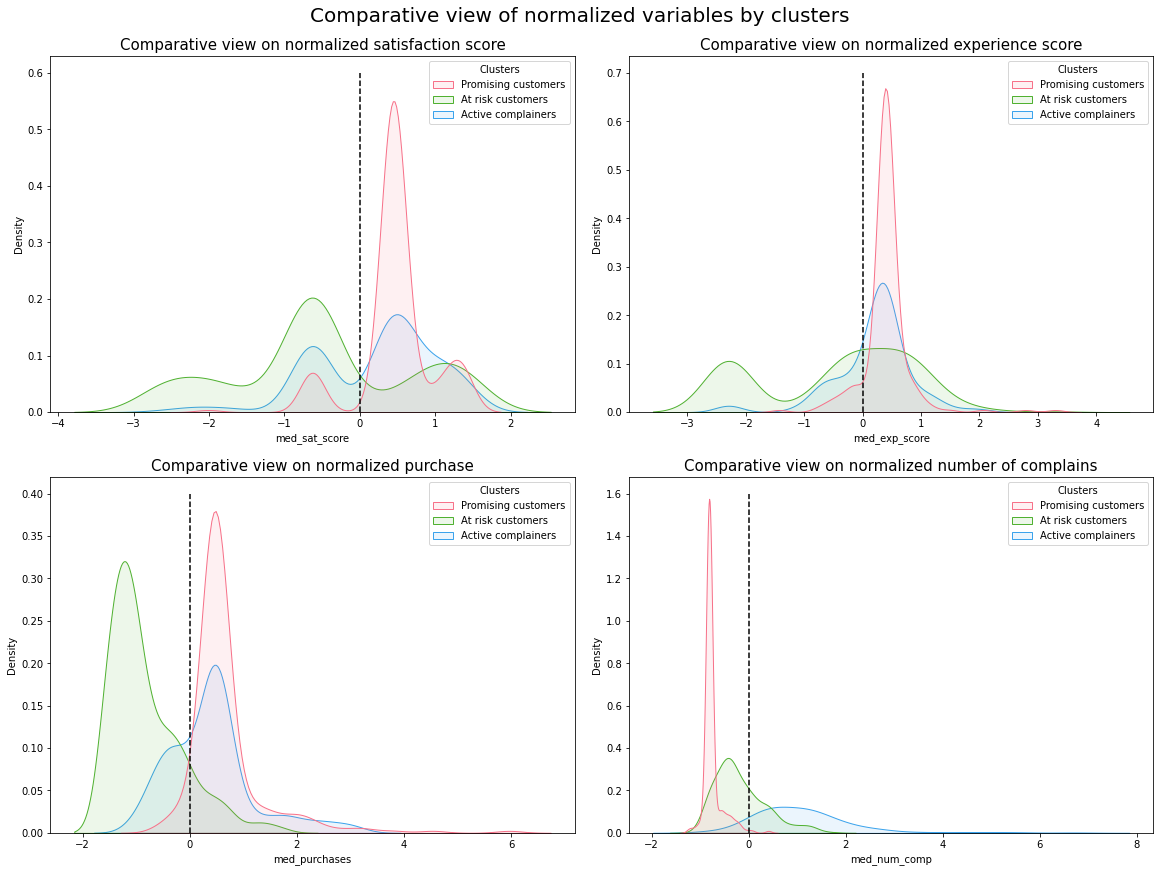

In [22]:
#Converting normalized data into dataframe for better visualization purpose
df = pd.DataFrame(norm_data, index = grp_data.index, columns = grp_data.columns)
df['Clusters'] = clus_data['Clusters']

#Comparative visualization of normalized variables
fig, axes = plt.subplots(2, 2, figsize = (16, 12), constrained_layout = True)
fig.suptitle('Comparative view of normalized variables by clusters', size = 20)

sns.kdeplot(ax = axes[0,0],  x = 'med_sat_score', data = df, hue = 'Clusters', fill = True, alpha = 0.1, palette="husl")
sns.kdeplot(ax = axes[0,1],  x = 'med_exp_score', data = df, hue = 'Clusters', fill = True, alpha = 0.1, palette="husl")
sns.kdeplot(ax = axes[1,0],  x = 'med_purchases', data = df, hue = 'Clusters', fill = True, alpha = 0.1, palette="husl")
sns.kdeplot(ax = axes[1,1],  x = 'med_num_comp', data = df, hue = 'Clusters', fill = True, alpha = 0.1, palette="husl")

axes[0,0].vlines(0, 0, 0.6, linestyles='dashed', colors='black')
axes[0,1].vlines(0, 0, 0.7, linestyles='dashed', colors='black')
axes[1,0].vlines(0, 0, 0.4, linestyles='dashed', colors='black')
axes[1,1].vlines(0, 0, 1.6, linestyles='dashed', colors='black')

axes[0,0].set_title('Comparative view on normalized satisfaction score', size = 15)
axes[0,1].set_title('Comparative view on normalized experience score', size = 15)
axes[1,0].set_title('Comparative view on normalized purchase', size = 15)
axes[1,1].set_title('Comparative view on normalized number of complains', size = 15)

plt.show()

# Conclusion
Finding your target market helps you focus on who your company will serve and why those customers need your products or services. By defining this information, a target audience is also kept at a tolerable size. After conducting the analysis, we identified the percentage of doctors who are more likely to be potential customers, customers who are more likely to churn, and complainers. These individuals' insightful comments and complaints are essential for identifying the main problems that consumers are experiencing and for retaining their satisfaction by finding solutions to those pressing issues. Understanding the consumer base will allow the business to grow more as a result of all these information. The only people who can assist you generate more leads and business are your customers, so get to know them better. In order to provide excellent customer service and build strong customer connections that lead to new sales through favorable word-of-mouth recommendations, it is essential to understand your consumers. The business will be able to design more effective target marketing, customer service, and product development strategies in this way.

# Future analysis

The entire project's success hinges on locating the primary cause of the lower engagement of at-risk consumers and the massive volume of complaints made by the active complainers, then fixing these issues to improve the overall customer experience. This accomplishment relates to the implementation of future studies on at-risk consumers to ensure that their goals are truly understood and where the shortcomings during the customer journey or after purchase experience might have been. and vocal critics to pinpoint the root of the issues and figure out how to solve them so that the business becomes the top choice for all of the target audiences.

# Reference

1. Python, R. (n.d.). K-Means Clustering in Python: A Practical Guide – Real Python. [online] realpython.com. Available at: https://realpython.com/k-means-clustering-python/.

2. Trevino, A. (2016). Introduction to K-means Clustering. [online] Oracle.com. Available at: https://blogs.oracle.com/ai-and-datascience/post/introduction-to-k-means-clustering.